# Project - AllLife Credit Card Customer Segmentation

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

#### Domain 
Banking

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

In [4]:
from sklearn import metrics

#### Imported basic libraries

In [5]:
# Load dataset into dataframe
df = pd.read_csv('bank.csv')

In [6]:
# having insight of data by selecting 5 rows
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# by looking at data we can see RowNumber, CustomerId, and Surname column are unique to customer 
# and these columns can not be used in prediction
# we will delete these columns

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# checking size of dataframe
print('\033[1mShape of Dataset: \033[0m', df.shape)

Shape of Dataset:  (10000, 11)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
# changing Geography and Gender into category column
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [13]:
# Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

In [14]:
# checking datatype and not null count. We can see each column has 600 rows so there is no missing values
print('\033[1mDatatype Info:\033[0m')
print()
df.info()

Datatype Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [15]:
# checking no of 0 in dataframe
df.eq(0).any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure              True
Balance             True
NumOfProducts      False
HasCrCard           True
IsActiveMember      True
EstimatedSalary    False
Exited              True
dtype: bool

In [16]:
# colummn Tenure, Balance, HasCrCard and IsActiveMember have 0's in data
# but that looks quite logical to have zero for these column
# Exited is categorical output column with 0 and 1 values 

In [17]:
print('\033[1mValue counts of all categorical columns:\033[0m')
# In dataset below columns are categorical columns
# 'Geography', Gender'
print('Geography')
print()
print(df['Geography'].value_counts())
print()
print('Gender')
print(df['Gender'].value_counts())

Value counts of all categorical columns:
Geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender
Male      5457
Female    4543
Name: Gender, dtype: int64


## Exploratory Data Analysis  

### Univariate analysis

In [18]:
# Transposing it for better view
print('\033[1mStatistical Summary:\033[0m')
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [19]:
# Balance is right skewed

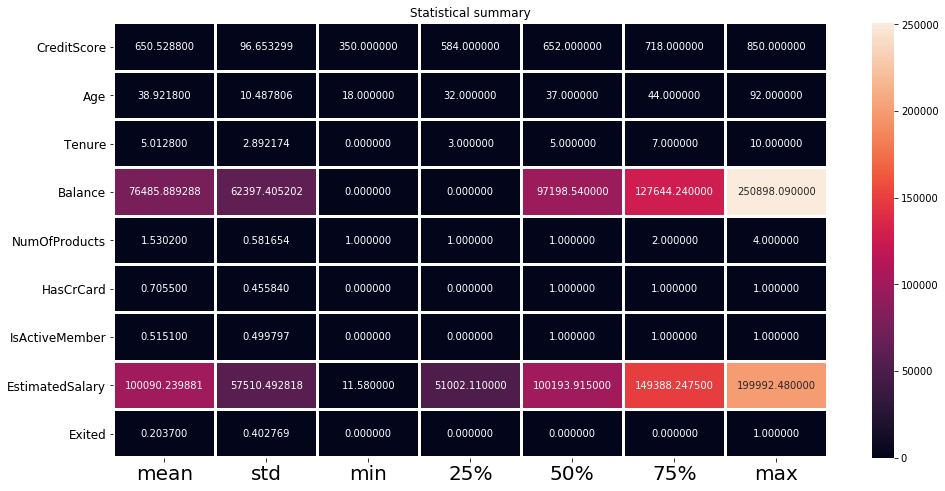

In [20]:
# Ignoring count column and displaying same statistical summary in headmap
plt.figure(figsize=(16,8))
sns.heatmap(df.describe()[1:].transpose(),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Statistical summary")
plt.show()

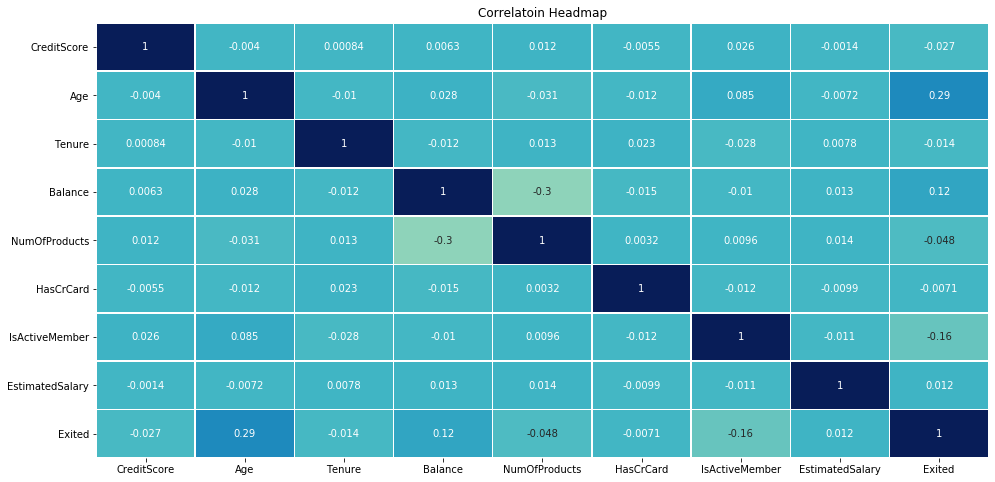

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.title("Correlatoin Headmap")
plt.show()

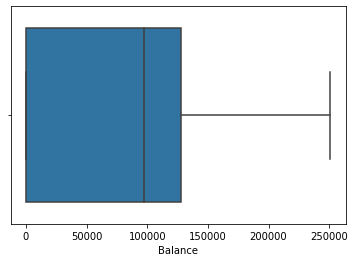

In [22]:
sns.boxplot(data=df, x='Balance') 

Balance


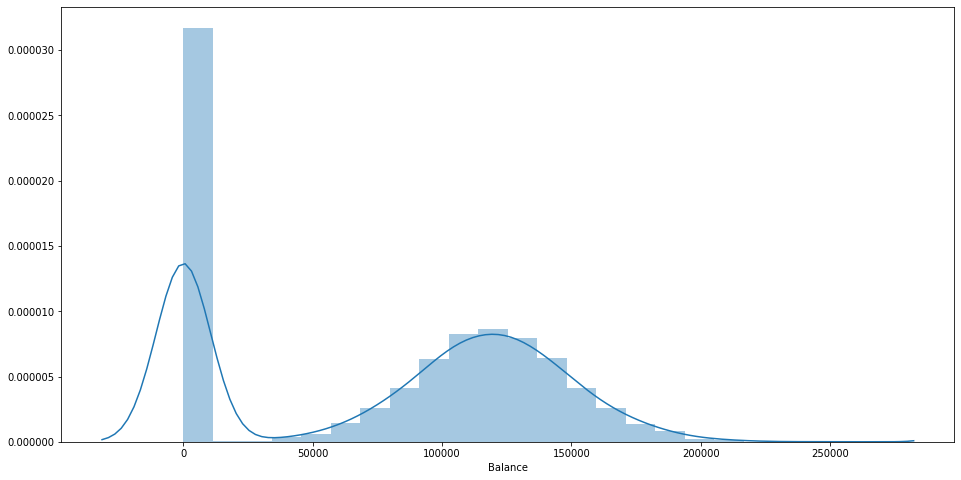

In [23]:
plt.figure(figsize=(16,8))
sns.distplot(df['Balance'])
print('Balance')

In [24]:
# big chunk of customer has zero balance

CreditScore


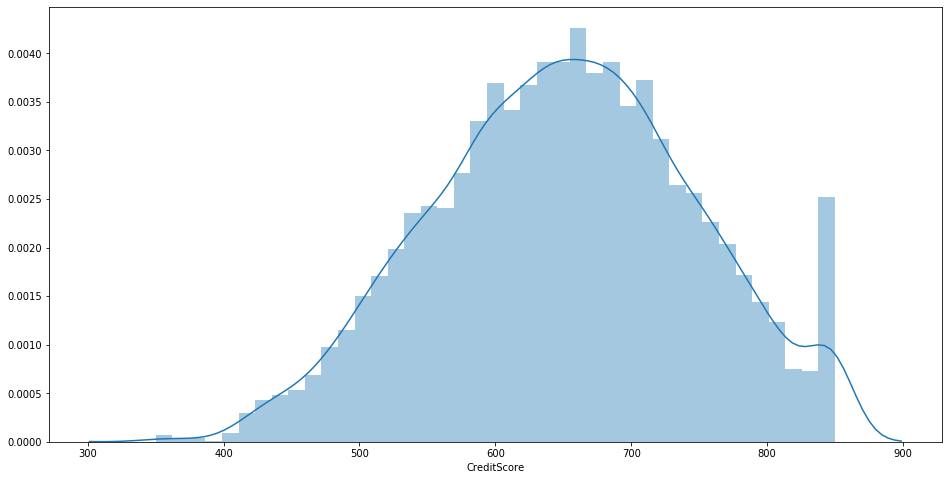

In [25]:
plt.figure(figsize=(16,8))
sns.distplot(df['CreditScore'])
print('CreditScore')

Age


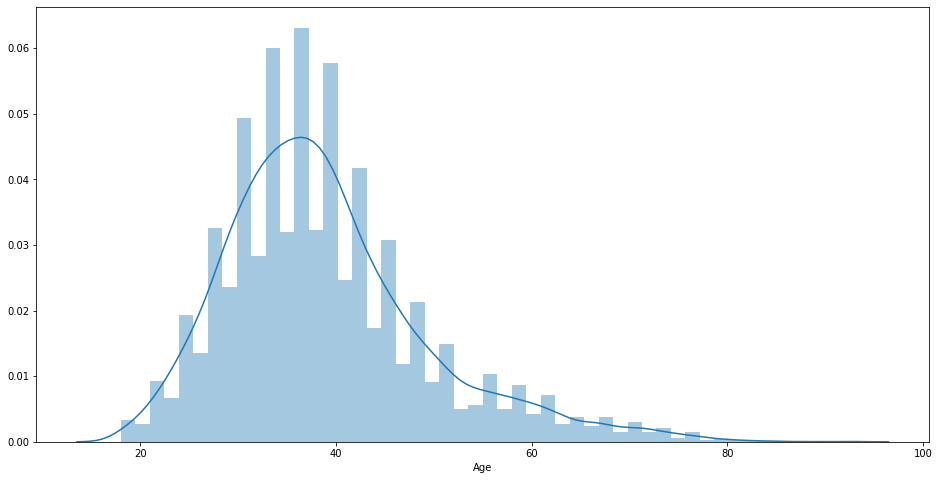

In [26]:
plt.figure(figsize=(16,8))
sns.distplot(df['Age'])
print('Age')

In [27]:
# most client are between 30 and 50 age range

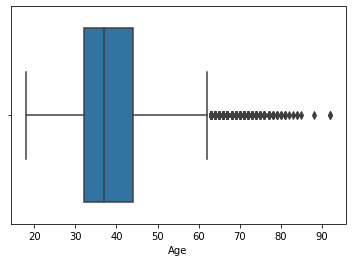

In [28]:
sns.boxplot(data=df, x='Age') 

In [29]:
# we have outliers in age 

EstimatedSalary


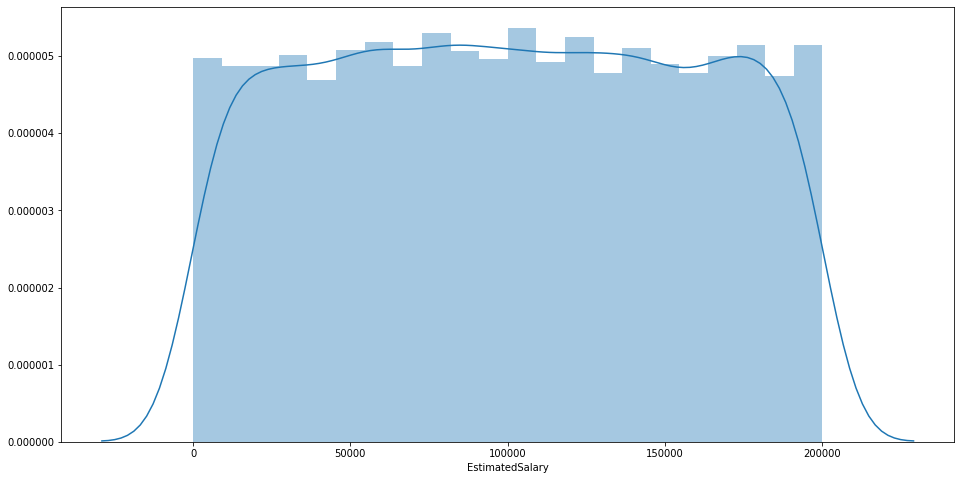

In [30]:
plt.figure(figsize=(16,8))
sns.distplot(df['EstimatedSalary'])
print('EstimatedSalary')

Tenure


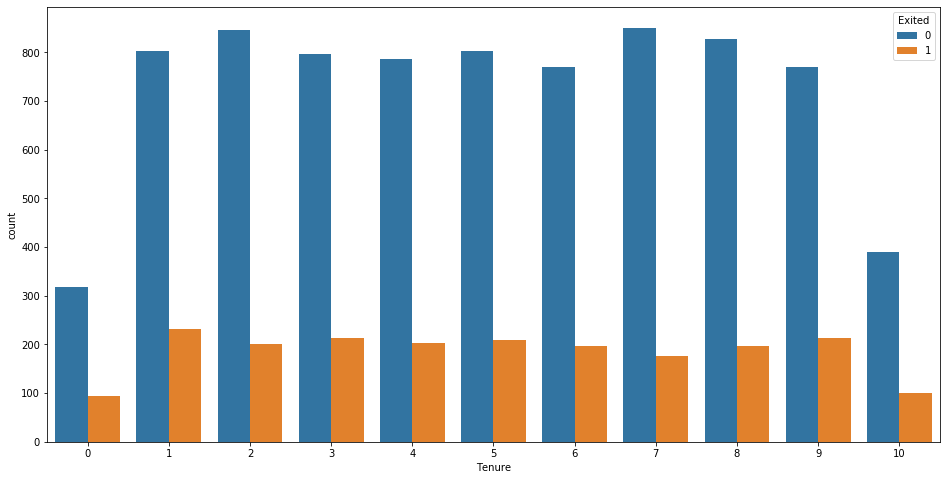

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(x='Tenure', hue='Exited', data=df)
print('Tenure')

NumOfProducts


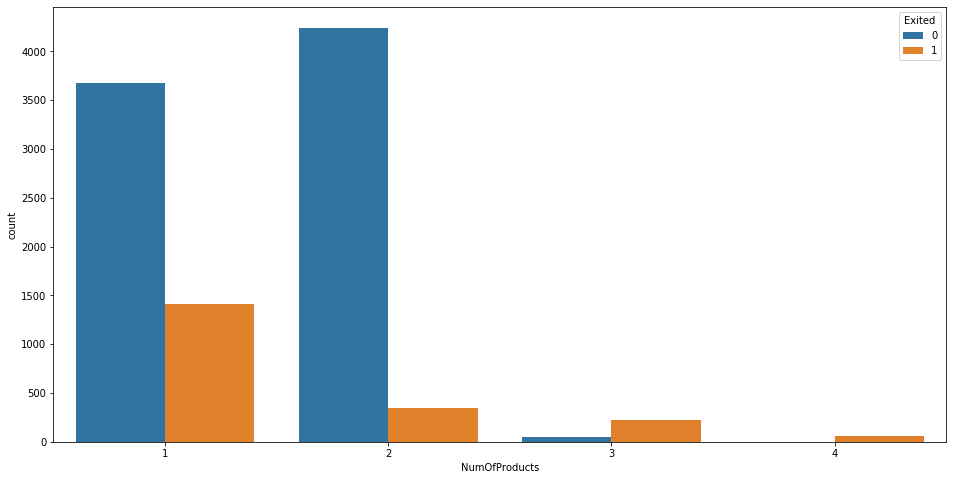

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
print('NumOfProducts')

HasCrCard


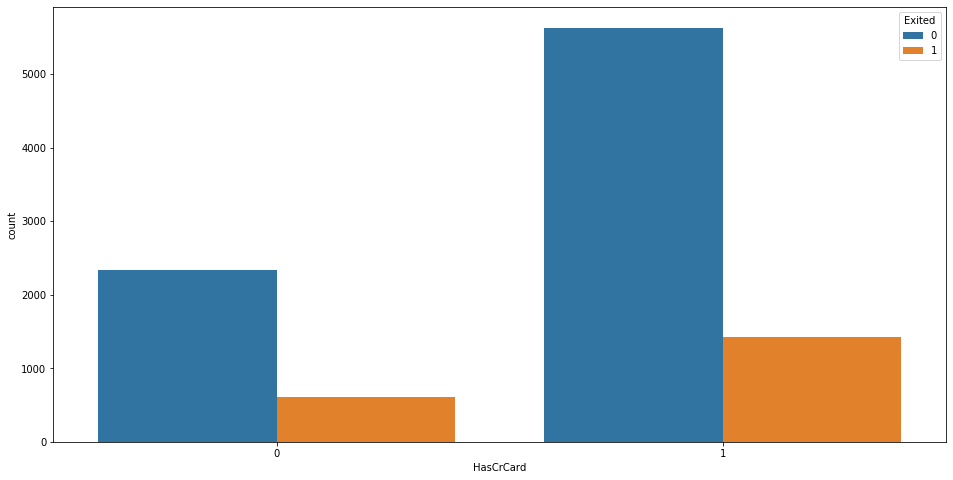

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
print('HasCrCard')

IsActiveMember


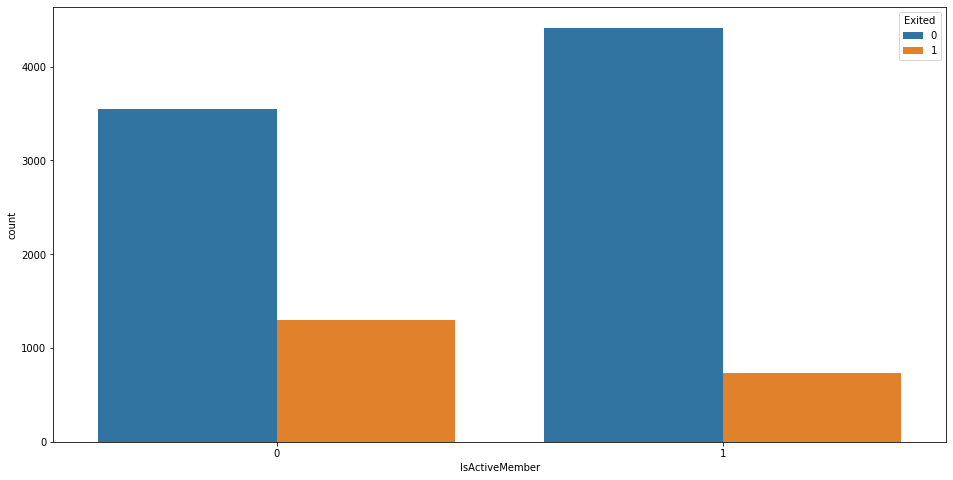

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
print('IsActiveMember')

Geography


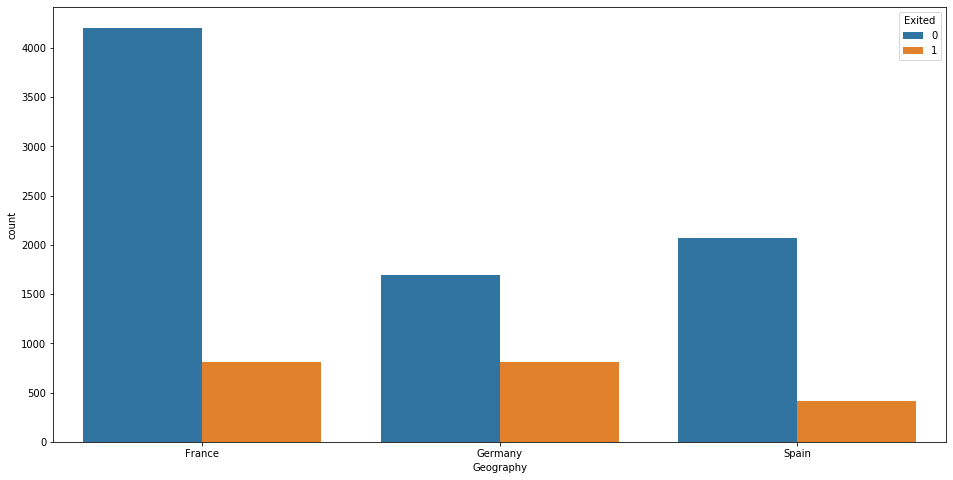

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x='Geography', hue='Exited', data=df)
print('Geography')

Gender


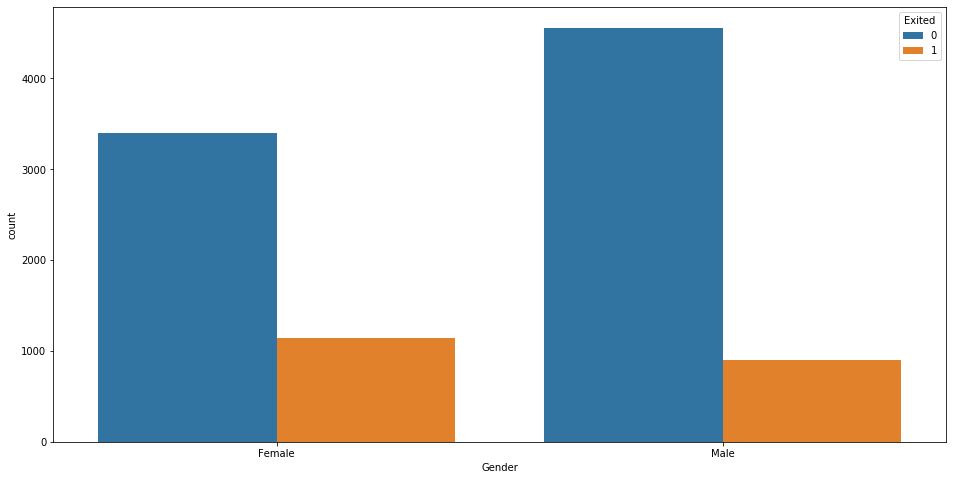

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(x='Gender', hue='Exited', data=df)
print('Gender')

Exited


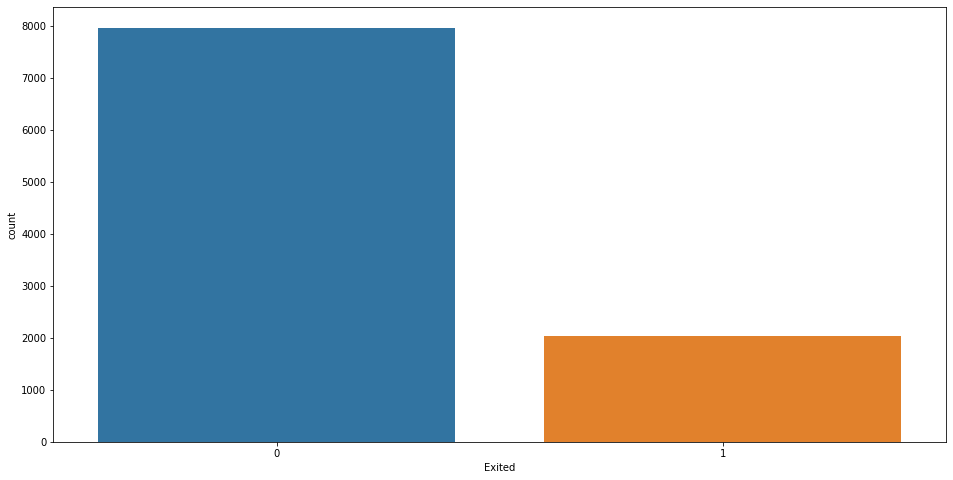

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(df['Exited'])
print('Exited')

In [38]:
# by looking at above graph we see that our data is imbalanced, 
# because we have 80% of zeros and we have 20% of ones that may make problems with predication
# i am continuing with existing data without scalling 

### Bi-Variate analysis

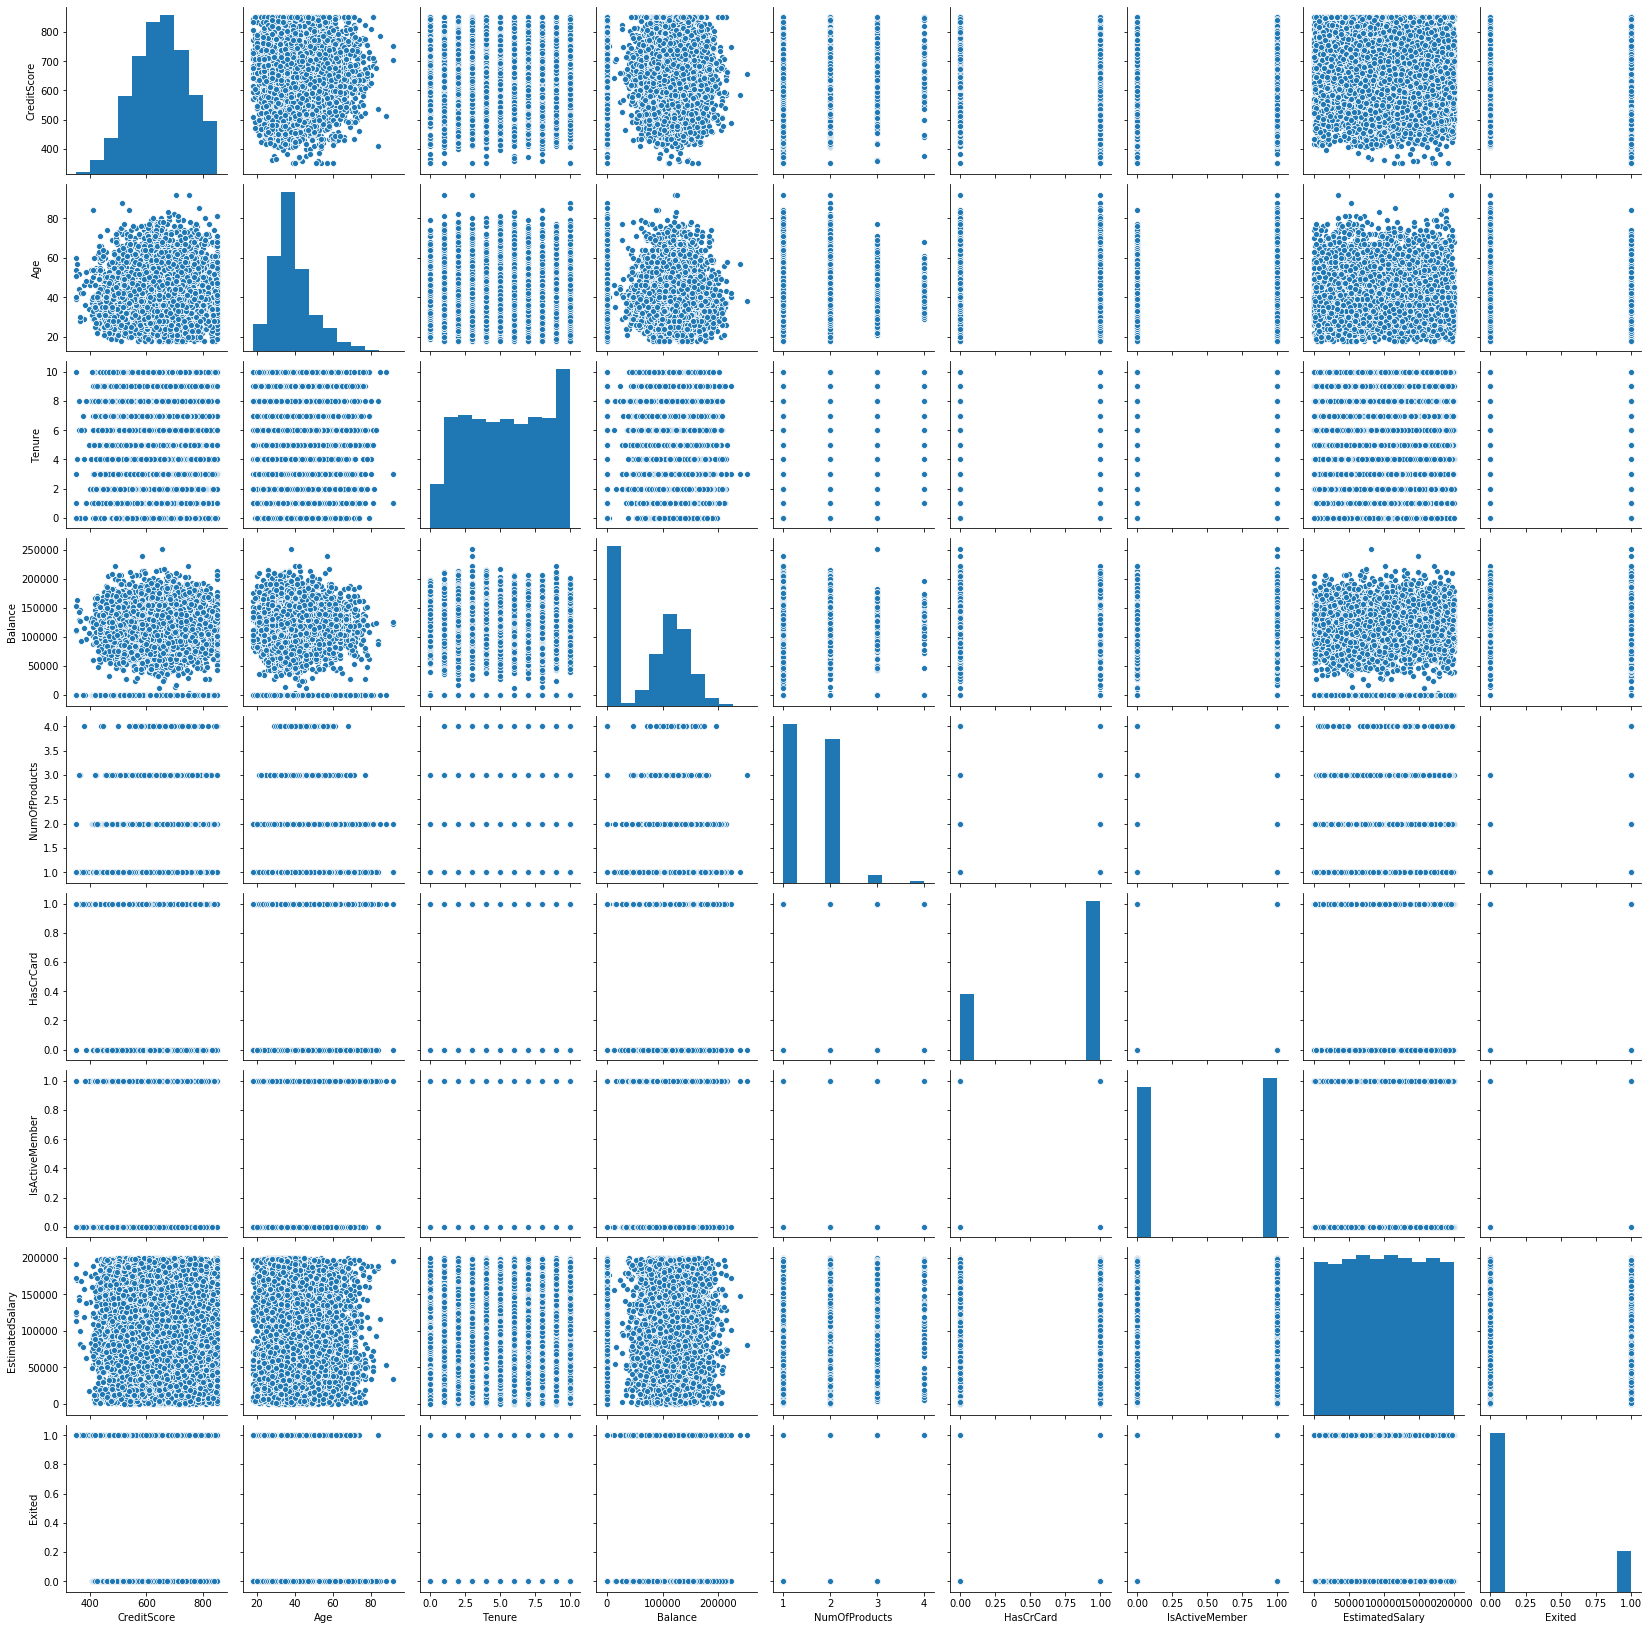

In [39]:
sns.pairplot(df) 

### Features and Target variable

In [40]:
# Existed column is taget variable and other columns are features

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Get data model ready:

In [42]:
# HasCrCard, IsActiveMember and Exited columns are categorical columns but has only 1 and 0 values
# so it's okay to keep them like that
# lets create dummies for category columns Geography and Gender

In [43]:
# Creating Dummies for Geography column
df = pd.get_dummies(df, columns=['Geography'],drop_first=True)

In [44]:
# Creating Dummies for Gender column
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)

In [45]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


### Standardize the data and split into train, test

In [47]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [48]:
# creating features and target variables

X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [49]:
# Train test split using features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [50]:
# Normalize dataset
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [51]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000,)
testing shapes: (2000, 11), (2000,)


In [54]:
import tensorflow as tf

In [55]:
# converting to tensor
X_train=tf.convert_to_tensor(X_train.values)
y_train=tf.convert_to_tensor(y_train.values)
X_test=tf.convert_to_tensor(X_test.values)
y_test=tf.convert_to_tensor(y_test.values)

In [56]:
print(f'training tensor shapes: {X_train.shape}, {y_train.shape}')
print(f'testing tensor shapes: {X_test.shape}, {y_test.shape}')

training tensor shapes: (8000, 11), (8000,)
testing tensor shapes: (2000, 11), (2000,)


### Neural Network Modeling

In [58]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [59]:
model_first = Sequential()

In [60]:
# Define model architecture

model_first.add(Dense(6, activation='relu', input_dim = 11))   # input layer
model_first.add(Dense(6, activation = 'relu'))                # first hidden layer
model_first.add(Dense(3, activation = 'relu'))                # second hidden layer
model_first.add(Dense(1, activation='sigmoid'))               # output layer


In [61]:
model_first.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model_first.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_first.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 78us/sample - loss: 0.6168 - accuracy: 0.7972
Epoch 2/10
8000/8000 [==============================] - 0s 14us/sample - loss: 0.5266 - accuracy: 0.7972
Epoch 3/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.4880 - accuracy: 0.7972
Epoch 4/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.4677 - accuracy: 0.7972
Epoch 5/10
8000/8000 [==============================] - 0s 14us/sample - loss: 0.4551 - accuracy: 0.7972
Epoch 6/10
8000/8000 [==============================] - 0s 14us/sample - loss: 0.4463 - accuracy: 0.7972
Epoch 7/10
8000/8000 [==============================] - 0s 13us/sample - loss: 0.4401 - accuracy: 0.7972
Epoch 8/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.4356 - accuracy: 0.7972
Epoch 9/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.4312 - accuracy: 0.7972
Epoch 10/10
8000/8000 [==========

In [64]:
# training set
loss, acc = model_first.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.797
Loss: 0.425


In [65]:
# testing set
loss, acc = model_first.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.793
Loss: 0.426


In [66]:
# creating accuracy dataframe to store different model performance for later comparision
accuracyDf = pd.DataFrame({'Method':['First Model'],  'Accuracy': acc, 'Loss': loss})

accuracyDf

,Method,Accuracy,Loss
0,First Model,0.7925,0.42611


In [67]:
y_predict = model_first.predict(X_test)

In [68]:
y_predict
# this is probability

array([[0.09470215],
       [0.17770997],
       [0.18821207],
       ...,
       [0.09715927],
       [0.14453888],
       [0.3455346 ]], dtype=float32)

In [69]:
y_pred = (y_predict > 0.5)
y_pred
# putting threshold as 0.5 to change probability into 0 and 1 classification

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [70]:
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix of First Model')
print(cm)

Confusion Matrix of First Model
[[1585    0]
 [ 415    0]]


In [71]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



#### new model with only one input layer

In [72]:
model_second = Sequential()

In [73]:
model_second.add(Dense(32, activation='relu', input_dim = 11))   # input layer
model_second.add(Dense(32, activation = 'relu'))                 # hidden layer
model_second.add(Dense(1, activation='sigmoid'))                 # output layer

In [74]:
model_second.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_second.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_second.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 53us/sample - loss: 0.4884 - accuracy: 0.7986
Epoch 2/10
8000/8000 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.81 - 0s 21us/sample - loss: 0.4320 - accuracy: 0.8173
Epoch 3/10
8000/8000 [==============================] - 0s 17us/sample - loss: 0.4160 - accuracy: 0.8261
Epoch 4/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.3993 - accuracy: 0.8321
Epoch 5/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.3815 - accuracy: 0.8435
Epoch 6/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.3649 - accuracy: 0.8520
Epoch 7/10
8000/8000 [==============================] - 0s 15us/sample - loss: 0.3540 - accuracy: 0.8553
Epoch 8/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.3483 - accuracy: 0.8583
Epoch 9/10
8000/8000 [==============================] - 0s 16us/sample - loss: 0.3438 - accuracy

In [76]:
loss, acc = model_second.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.859
Loss: 0.342


In [77]:
tempScore = pd.DataFrame({'Method':['Second Model'], 'Accuracy': acc, 'Loss': loss})

accuracyDf = pd.concat([accuracyDf, tempScore])

accuracyDf


,Method,Accuracy,Loss
0,First Model,0.7925,0.426110
0,Second Model,0.8585,0.342461


In [78]:
y_predict = model_second.predict(X_test)

In [79]:
y_predict
# this is probability

array([[0.0533649 ],
       [0.09574261],
       [0.12931696],
       ...,
       [0.04064357],
       [0.05813307],
       [0.425631  ]], dtype=float32)

In [80]:
y_pred = (y_predict > 0.5)
y_pred
# putting threshold as 0.5 to change probability into 0 and 1 classification

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [81]:
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix using second Model')
print(cm)

Confusion Matrix using second Model
[[1517   68]
 [ 215  200]]


In [82]:
# classification report of second model
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1585
           1       0.75      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [83]:
accuracyDf

,Method,Accuracy,Loss
0,First Model,0.7925,0.426110
0,Second Model,0.8585,0.342461


In [ ]:
# by lookin at matrix we can say second model is performing better in prediction

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed
  

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur